Monte Carlo Simulation for Evacuation  
Zhesong Wu

Libraries: 
1. OSMnx: Open Street Map package, see: https://github.com/gboeing/osmnx 
2. Networkx: more information see: https://networkx.github.io/ 
3. ffmpeg: need for animation, more infomration see: https://www.ffmpeg.org/
4. Pandas and Numpy 

Files: 
Classes, methods and default values in 'Model.py'


In [1]:

import os

# run the commented line with your own GDAL DATA path if you meet projection library lack problem
# you can search the locaiton of the file under the GDAL librarby
# os.environ['GDAL_DATA'] = r'C:\Users\JAPO\Anaconda3\pkgs\libgdal-2.4.3-hc7758a1_8\Library\share\gdal'

import osmnx as ox
import pandas as pd
import networkx as nx
filename = r'D:\UIUC\final_projects\Models.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))

Study Area: 
1000 meters near Student Union 

Notice, you can define your own study area by changing the central address and graph distance. Also, many other methods are provided in osmnx like graph from coordinates. The clean function is defined from Model.py to fill geometry data for each road if it is lacking. 

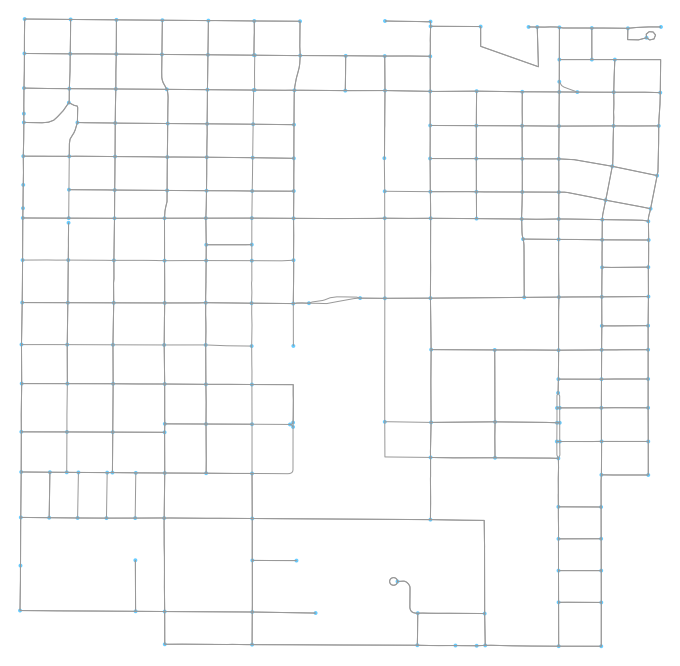

(<Figure size 860.103x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19c7f985a90>)

In [2]:
graph_distance = 1000
central_address = '1401 W Green St, Urbana, IL 61801'
g = ox.graph_from_address(central_address, distance=graph_distance, distance_type='bbox', network_type='drive')
g= clean(ox.project_graph(g))
ox.plot_graph(g, fig_height = 12)

Single Model:

Model input: graph, number of people, number of refuges, and the evacuation strategy.  
 
Additionally, you can change the refuge max capacity, road max capacity, and the threshold of death rate in the python file to test your own model.
 
 
See more details in Model.py

In [59]:
model = Model(g,1000,2,1)

find_refuge() is to find the routes for every individual.  
  
run() is to run the model.  
There are two ways to run the model: Fixed steps, and complete run. 
1. Fixed steps: type in the paramters like run(nsteps=n), where n is the number of the timesteps you want to run, you can use this methods to analyze the behavior of people in any specific time stage. 
2. Complete run: type in the parameters like run(save_args=(fig, ax, filename)). By using the complete run you can run your model to the end. The final stage of individuals would be output as a csv file. Additionally, a short movie would be created to visualize the whole evacuation.

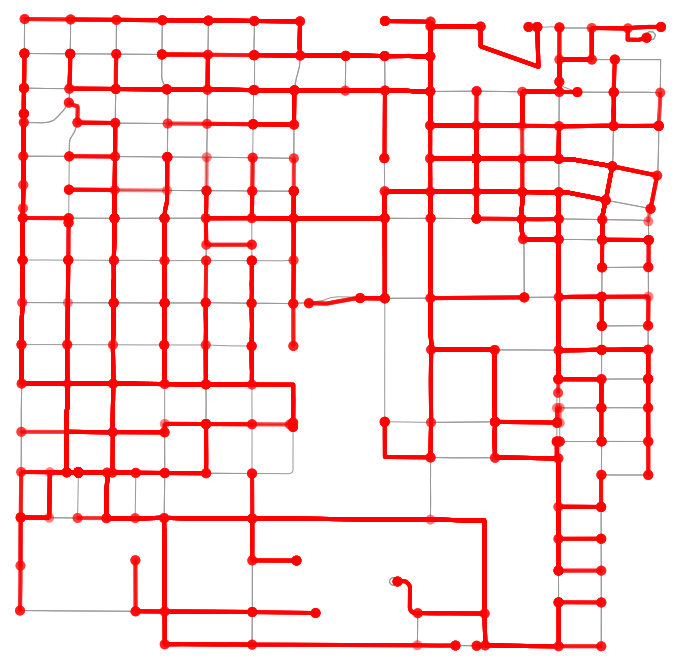

In [60]:
model.find_refuge(show_map=1)

Methods1: Fixed Steps

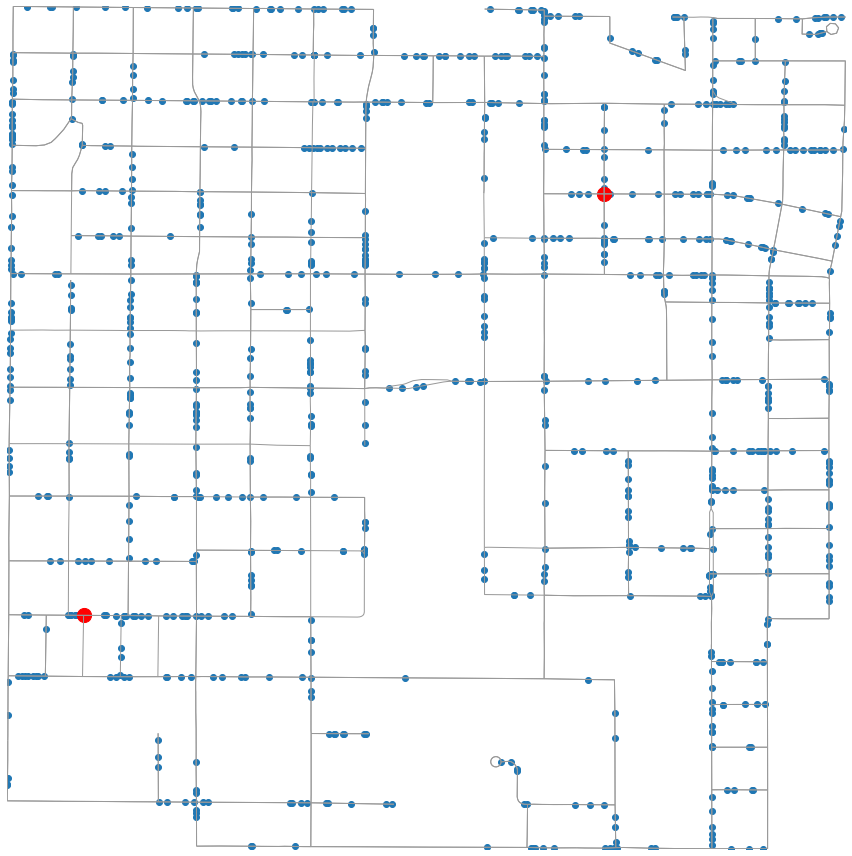

In [61]:
# Location of people when generated
fig, ax = ox.plot_graph(g, node_size=0, fig_height=12, show=False, margin=0)
fig.tight_layout()
model.show(ax)
model.show_refuge(ax)
fig

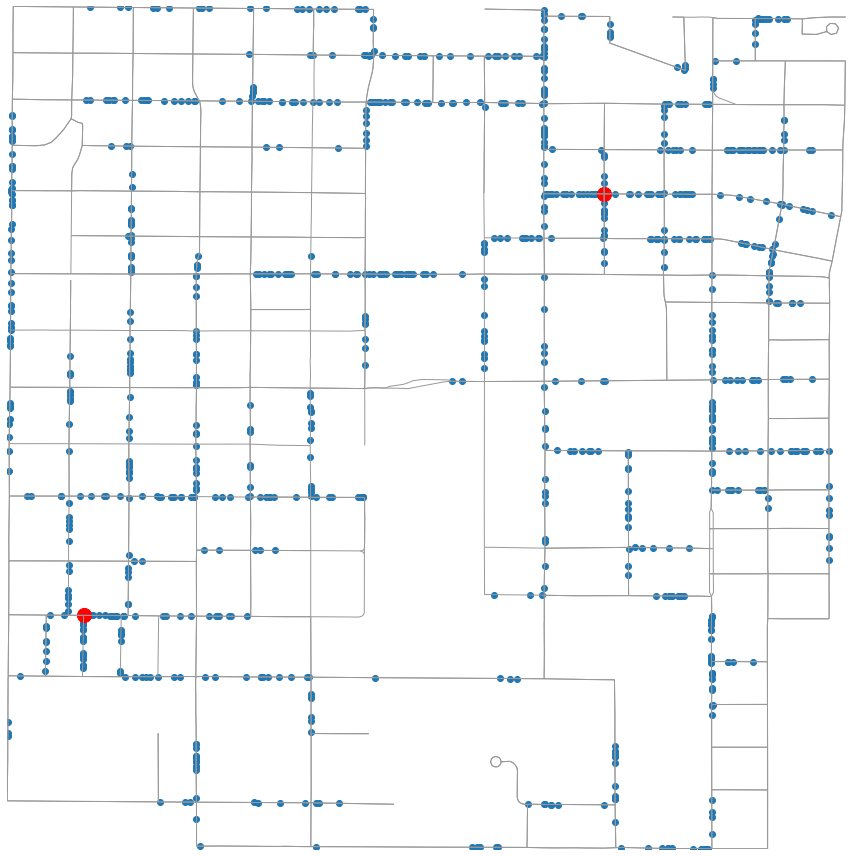

In [62]:
# Location of people after 30 timestep
fig, ax = ox.plot_graph(g, node_size=0, fig_height=12, show=False, margin=0)
fig.tight_layout()
model.run(nsteps=30)
model.show(ax)
model.show_refuge(ax)
fig

Methods 2: Complete Run 
 
Notice: I did not define any reverse or undo function, now all the process of the model is INREVERSIBLE

In [63]:
model2 = Model(g,10,2,1)
fig, ax = ox.plot_graph(g, node_size=0, fig_height=15, show=False, margin=0)
fig.tight_layout()
model2.run(save_args=(fig,ax,'result'))

Evacuation completed at time: 814


In [72]:
model3 = Model(g,10,2,0)
fig, ax = ox.plot_graph(g, node_size=0, fig_height=15, show=False, margin=0)
fig.tight_layout()
model3.run(save_args=(fig,ax,'result'))

Evacuation completed at time: 239


Simple Analysis for the Evacuation Model 

Hypothesis: a flexible-plan evacuation should have a higher performance than fixed-plan evacuation

To prove whether the hypothesis is correct or not, we build two different models, one using strategy 0 and the other using strategy 1

Common Parameters:

Refuge Capacity: 1000  
Refuge Number: 4  
Road Max Density: 0.5 (a 100m road's max capacity is 50 person)  
Person's Speed: random number between 4-5  
Person's Preference: random number between 0.5-1 (on which extend a person would think about changing plan)  
Person number: 5000   
Sample size: 10 (It takes too much time to run more)

Model 1: Strategy 1: flexible plan   
Model 2: Strategy 2: fixed plan

In [3]:
model_1 = []
model_2 = []
for i in range(10):
    model_1.append(Model(g,5000, 4,1))
    model_2.append(Model(g,5000, 4,0))
    

Run the first model (flexible plan)

In [4]:
os.chdir(r'D:\UIUC\final_projects\analysis')
for i in range(10):
    model = model_1[i]
    filename = 'withStrategy_result_' + str(i)
    fig, ax = ox.plot_graph(g, node_size=0, fig_height=12, show=False, margin=0)
    fig.tight_layout()
    model.run(save_args=(fig,ax,filename))


Evacuation completed at time: 1001
Evacuation completed at time: 553
Evacuation completed at time: 884
Evacuation completed at time: 911
Evacuation completed at time: 859
Evacuation completed at time: 563
Evacuation completed at time: 691
Evacuation completed at time: 911
Evacuation completed at time: 990
Evacuation completed at time: 602


Run the second model (fixed plan)

In [5]:
for i in range(10):
    model = model_2[i]
    filename = 'withoutStrategy_result_' + str(i)
    fig, ax = ox.plot_graph(g, node_size=0, fig_height=12, show=False, margin=0)
    fig.tight_layout()
    model.run(save_args=(fig,ax,filename))

Evacuation completed at time: 493
Evacuation completed at time: 1058
Evacuation completed at time: 488
Evacuation completed at time: 670
Evacuation completed at time: 631
Evacuation completed at time: 565
Evacuation completed at time: 1268
Evacuation completed at time: 775
Evacuation completed at time: 984
Evacuation completed at time: 1000


Result Analysis

In [6]:
costs_s = []
safe_rate_s = []
costs_w = []
safe_rate_w = []
for file in os.listdir(r'D:\UIUC\final_projects\analysis'):
    if file.endswith('.csv') and 'without' not in file:
        df = pd.read_csv(file)
        costs_s.append(df['time'].max())
        agg = df.groupby('status').agg({'time':'count'})
        #safe_rate_s.append(g.loc['Arrived','time']/1000)
    if file.endswith('.csv') and 'without' in file:
        df = pd.read_csv(file)
        costs_w.append(df['time'].max())
        agg = df.groupby('status').agg({'time':'count'})
        #safe_rate_s.append(g.loc['Arrived','time']/1000)
                     

In [7]:
#summary = {'time_flexible': costs_s, 'time_fixed': costs_w, 
#           'safe_rate_flexible': safe_rate_s, 'safe_rate_fixed': safe_rate_w}
summary = {'time_flexible': costs_s, 'time_fixed': costs_w }
summary_df = pd.DataFrame(summary)

In [8]:
summary_df.describe()

,time_flexible,time_fixed
count,10.000000,10.000000
mean,796.500000,793.200000
std,176.326874,269.131442
min,553.000000,488.000000
25%,624.250000,581.500000
50%,871.500000,722.500000
75%,911.000000,996.000000
max,1001.000000,1268.000000


Conclusion:  
1. Since the sample size is relatively low, we do not see a very apparent difference between two strategies. And my conclusion is a flexible plan might help individual to escape, but in a higher scale, such a strategy would not reduce the total time.
2. The lower standard deviation and lower maximum might mean that in most case, a flexible plan might be a better choice 

Limitations:  
Low code efficiency.  
Two low sample size
A more realistic model by introducing road close rate  
Research on real data might help improve the performance. 

Reference:  
Vandewalle, Rebecca, at al. "Intergrating CyberGIS-Jupyter and Spatial Agent-Based Modeling to Evaluate Emergency Evacuation Time".(2019)